# Additional - Beam

![](https://raw.githubusercontent.com/ibcmrocha/public/main/beam.png)

With:
- $l_1 = 5.5$
- $l_2 = 5.0$
- $EI_1 = 5000$
- $EI_2 = 8000$
- $q = 6$
- $F = 40$
- $T = 50$

Solve this problem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matrixmethod as mm
%config InlineBackend.figure_formats = ['svg']

In [2]:
L1 = 5.5
L2 = 5.0
EI1 = 5000
EI2 = 8000
q = 6
F = 40
T = 50

mm.Node.clear()
mm.Element.clear()

nodeA = mm.Node(0, 0)
nodeB = mm.Node(L1, 0)
nodeC = mm.Node(L1 + L2, 0)
nodes = [nodeA, nodeB, nodeC]
amount_of_nodes = len(nodes)

elemAB = mm.Element(nodeA, nodeB)
elemAB.set_section({'EI': EI1})
elemBC = mm.Element(nodeB, nodeC)
elemBC.set_section({'EI': EI2})
elems = [elemAB, elemBC]

con = mm.Constrainer()

con.fix_dof(nodeA, 1)
con.fix_node(nodeC)

nodeB.add_load([0, F, -T])
elemAB.add_distributed_load([0, q])

K_global = np.zeros((3 * amount_of_nodes, 3 * amount_of_nodes))
f_global = np.zeros(3 * amount_of_nodes)

for elem in elems:
    elmat = elem.stiffness()
    idofs = elem.global_dofs()

    K_global[np.ix_(idofs, idofs)] += elmat

for node in nodes:
    f_global[node.dofs] += node.p

Kff, Fff = con.constrain(K_global, f_global)
u_free_global = np.linalg.inv(Kff) @ Fff
print(u_free_global)

support_reactions = con.support_reactions(K_global, u_free_global, f_global)
print(support_reactions)

[ 0.         -0.03374903  0.          0.08862872  0.01083637]
[ -25.7389757    0.         -47.2610243 -135.4907551]


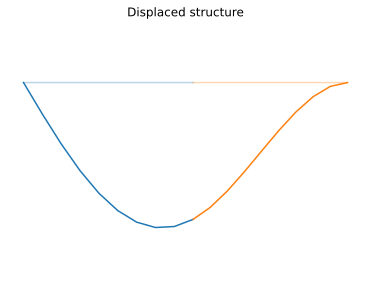

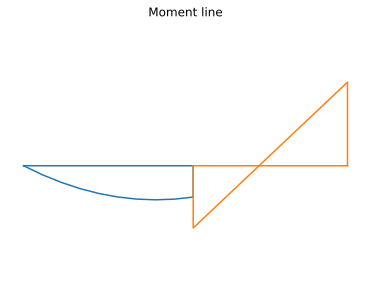

In [3]:
u_full_global = con.full_disp(u_free_global)
for elem in elems:
    elem.plot_displaced(u_full_global[elem.global_dofs()], 10, global_c=True, scale=50)

plt.figure()
for elem in elems:
    elem.plot_moment_diagram(u_full_global[elem.global_dofs()], 10, global_c=True, scale=0.02)